In [ ]:
#Instalando a biblioteca PYSPARK e GCP.

In [ ]:
!pip install gcsfs
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

#Importando a biblioteca PANDAS, NUMPY,MATPLOTLIB E PYSPARK

In [ ]:
import os    #importando o módulo
import pandas as pd  #importar a biblioteca "os" para interagir com o sistema operacional
import numpy as np    #importar a biblioteca "pandas" e atribuir o apelido "pd"
import matplotlib.pyplot as plt  #biblioteca popular para computação numérica em Python, fornecendo suporte para matrizes multidimensionais, funções matemáticas avançadas e manipulação eficiente de dados numéricos
from google.cloud import storage # Esse módulo fornece funcionalidade para interagir com o serviço de armazenamento em nuvem do Google Cloud Plataform (GCP)

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
#Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import regexp_replace
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/json chave_grupo5-394617-10ff4ddfb91d.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
client = storage.Client()
bucket = client.get_bucket('projeto_finalgp5')  #Nome da bucket
bucket.blob('marisa - Página1.csv')  #Nome do arquivo
path = 'gs://projeto_finalgp5/arqcsv/marisa - Página1.csv' #gsutil

In [ ]:
#Abertura da base de dados e cópia de segurança (bucket)
df_marisa  = pd.read_csv(path,
                 sep=',',
                 encoding='utf-8',
                 dayfirst = True)
dfback = df_marisa.copy()

In [ ]:
client = storage.Client()
bucket = client.get_bucket('projeto_finalgp5')  #Nome da bucket
bucket.blob('renner - Página1.csv')  #Nome do arquivo
path = 'gs://projeto_finalgp5/arqcsv/renner - Página1.csv' #gsutil

In [ ]:
#Abertura da base de dados e cópia de segurança (bucket)
df_renner  = pd.read_csv(path,
                 sep=',',
                 encoding='utf-8',
                 dayfirst = True)
dfback = df_renner.copy()

In [ ]:
df = pd.concat ([df_renner, df_marisa]) #juntar as tabelas

In [ ]:
df #Dataframe

,Data,31/03/2023,31/12/2022,30/09/2022,30/06/2022,31/03/2022,31/12/2021,30/09/2021,30/06/2021,31/03/2021,31/12/2020,30/09/2020,30/06/2020,31/03/2020,31/12/2019,30/09/2019,30/06/2019,31/03/2019
0,Ativo Total Renner,19.691.819,21.148.891,20.816.607,20.949.307,21.060.633,21.411.983,19.462.760,18.744.461,14.736.953,14.642.583,12.982.090,12.828.071,11.742.079,11.791.735,10.542.628,10.318.428,10.347.815
1,Estoques Renner,2.175.568,1.836.947,2.047.062,1.866.990,1.976.500,1.609.560,1.696.046,1.611.275,1.761.926,1.381.662,1.523.235,1.578.963,1.405.648,1.124.506,1.246.374,1.148.162,1.247.414
2,Investimentos Renner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fornecedores Renner,1.352.973,1.702.930,1.446.560,1.527.040,1.416.407,1.762.233,1.389.226,1.124.721,1.071.891,1.404.852,974.243,638.396,851.614,1.082.399,818.680,707.863,660.803
4,Patrimônio Líquido Renner,9.665.782,10.087.515,9.790.803,9.648.345,9.624.740,9.806.621,9.497.615,9.341.825,5.365.471,5.501.316,5.287.763,5.425.952,4.688.165,4.704.614,4.273.031,4.112.250,4.060.519
5,Receita Líquida de Vendas e/ou Serviços Renner,2.775.292,4.014.143,3.017.632,3.626.338,2.613.024,3.875.744,2.626.014,2.489.104,1.580.694,3.074.874,1.790.039,808.506,1.863.761,3.178.561,2.225.755,2.292.004,1.892.117
0,Ativo Total Marisa,2.911.241,3.104.952,3.582.988,3.617.087,3.338.452,3.423.185,3.370.923,3.256.365,3.278.729,3.367.654,3.008.529,3.145.454,3.418.120,4.020.068,3.489.169,3.557.368,3.587.410
1,Estoques Marisa,392.572,384.560,420.376,373.708,441.333,369.329,431.371,406.714,463.687,274.877,352.818,482.815,537.071,441.670,448.973,437.492,457.326
2,Investimentos Marisa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fornecedores Marisa,581.977,546.364,487.255,400.518,406.109,481.151,519.256,426.124,467.966,473.930,244.778,175.124,379.620,535.298,493.457,474.643,479.692


In [ ]:
df = df.transpose() #colunas viram linhas

In [ ]:
df

,0,1,2,3,4,5,0,1,2,3,4,5
Data,Ativo Total Renner,Estoques Renner,Investimentos Renner,Fornecedores Renner,Patrimônio Líquido Renner,Receita Líquida de Vendas e/ou Serviços Renner,Ativo Total Marisa,Estoques Marisa,Investimentos Marisa,Fornecedores Marisa,Patrimônio Líquido Marisa,Receita Líquida de Vendas e/ou Serviços Marisa
31/03/2023,19.691.819,2.175.568,0,1.352.973,9.665.782,2.775.292,2.911.241,392.572,0,581.977,368.340,560.298
31/12/2022,21.148.891,1.836.947,0,1.702.930,10.087.515,4.014.143,3.104.952,384.560,0,546.364,517.184,816.850
30/09/2022,20.816.607,2.047.062,0,1.446.560,9.790.803,3.017.632,3.582.988,420.376,0,487.255,973.981,619.302
30/06/2022,20.949.307,1.866.990,0,1.527.040,9.648.345,3.626.338,3.617.087,373.708,0,400.518,1.069.354,731.381
31/03/2022,21.060.633,1.976.500,0,1.416.407,9.624.740,2.613.024,3.338.452,441.333,0,406.109,1.093.501,582.388
31/12/2021,21.411.983,1.609.560,0,1.762.233,9.806.621,3.875.744,3.423.185,369.329,0,481.151,999.524,852.084
30/09/2021,19.462.760,1.696.046,0,1.389.226,9.497.615,2.626.014,3.370.923,431.371,0,519.256,931.310,654.613
30/06/2021,18.744.461,1.611.275,0,1.124.721,9.341.825,2.489.104,3.256.365,406.714,0,426.124,879.530,607.003
31/03/2021,14.736.953,1.761.926,0,1.071.891,5.365.471,1.580.694,3.278.729,463.687,0,467.966,945.580,411.748


In [ ]:
# Renomear colunas
df.rename(columns={'Ativo Total Renner':'Receita Renner',
                   'Receita Líquida de Vendas e/ou Serviços Renner':'Receita Liquida de vendas Renner'}, inplace=True)

In [ ]:
df

,0,1,2,3,4,5,0,1,2,3,4,5
Data,Ativo Total Renner,Estoques Renner,Investimentos Renner,Fornecedores Renner,Patrimônio Líquido Renner,Receita Líquida de Vendas e/ou Serviços Renner,Ativo Total Marisa,Estoques Marisa,Investimentos Marisa,Fornecedores Marisa,Patrimônio Líquido Marisa,Receita Líquida de Vendas e/ou Serviços Marisa
31/03/2023,19.691.819,2.175.568,0,1.352.973,9.665.782,2.775.292,2.911.241,392.572,0,581.977,368.340,560.298
31/12/2022,21.148.891,1.836.947,0,1.702.930,10.087.515,4.014.143,3.104.952,384.560,0,546.364,517.184,816.850
30/09/2022,20.816.607,2.047.062,0,1.446.560,9.790.803,3.017.632,3.582.988,420.376,0,487.255,973.981,619.302
30/06/2022,20.949.307,1.866.990,0,1.527.040,9.648.345,3.626.338,3.617.087,373.708,0,400.518,1.069.354,731.381
31/03/2022,21.060.633,1.976.500,0,1.416.407,9.624.740,2.613.024,3.338.452,441.333,0,406.109,1.093.501,582.388
31/12/2021,21.411.983,1.609.560,0,1.762.233,9.806.621,3.875.744,3.423.185,369.329,0,481.151,999.524,852.084
30/09/2021,19.462.760,1.696.046,0,1.389.226,9.497.615,2.626.014,3.370.923,431.371,0,519.256,931.310,654.613
30/06/2021,18.744.461,1.611.275,0,1.124.721,9.341.825,2.489.104,3.256.365,406.714,0,426.124,879.530,607.003
31/03/2021,14.736.953,1.761.926,0,1.071.891,5.365.471,1.580.694,3.278.729,463.687,0,467.966,945.580,411.748


In [ ]:
df_marisa

,Data,31/03/2023,31/12/2022,30/09/2022,30/06/2022,31/03/2022,31/12/2021,30/09/2021,30/06/2021,31/03/2021,31/12/2020,30/09/2020,30/06/2020,31/03/2020,31/12/2019,30/09/2019,30/06/2019,31/03/2019
0,Ativo Total Marisa,2.911.241,3.104.952,3.582.988,3.617.087,3.338.452,3.423.185,3.370.923,3.256.365,3.278.729,3.367.654,3.008.529,3.145.454,3.418.120,4.020.068,3.489.169,3.557.368,3.587.410
1,Estoques Marisa,392.572,384.560,420.376,373.708,441.333,369.329,431.371,406.714,463.687,274.877,352.818,482.815,537.071,441.670,448.973,437.492,457.326
2,Investimentos Marisa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fornecedores Marisa,581.977,546.364,487.255,400.518,406.109,481.151,519.256,426.124,467.966,473.930,244.778,175.124,379.620,535.298,493.457,474.643,479.692
4,Patrimônio Líquido Marisa,368.340,517.184,973.981,1.069.354,1.093.501,999.524,931.310,879.530,945.580,991.923,1.025.061,1.153.727,1.323.970,1.420.006,840.223,905.227,933.576
5,Receita Líquida de Vendas e/ou Serviços Marisa,560.298,816.850,619.302,731.381,582.388,852.084,654.613,607.003,411.748,760.414,532.175,277.056,569.772,890.099,697.480,690.228,604.615


In [ ]:
#Transformando o PANDAS em CSV
df_marisa.to_csv("teste2.csv", encoding= "utf-8")

In [ ]:
import pandas as pd
from google.colab import files


In [ ]:
df = spark.read.csv("teste2.csv", sep=',',
                       inferSchema=True, header=True)

In [ ]:
df.show()

+---+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|_c0|                Data|31/03/2023|31/12/2022|30/09/2022|30/06/2022|31/03/2022|31/12/2021|30/09/2021|30/06/2021|31/03/2021|31/12/2020|30/09/2020|30/06/2020|31/03/2020|31/12/2019|30/09/2019|30/06/2019|31/03/2019|
+---+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|  0|  Ativo Total Marisa| 2.911.241| 3.104.952| 3.582.988| 3.617.087| 3.338.452| 3.423.185| 3.370.923| 3.256.365| 3.278.729| 3.367.654| 3.008.529| 3.145.454| 3.418.120| 4.020.068| 3.489.169| 3.557.368| 3.587.410|
|  1|     Estoques Marisa|   392.572|   384.560|   420.376|   373.708|   441.333|   369.329|   431.371|   406.714|   463.687|   274.877|   352.8

In [ ]:
#column_to_drop = "_c0"
#df.drop(column_to_drop)

In [ ]:
# Cálculo de Rentabilidade Marisa
import pandas as pd

df = pd.DataFrame({'Data': ['2019-03-31', '2020-12-31', '2021-09-30', '2022-06-30'],
                   'receitas': [199223,2139417,2899831,2749921],
                   'patrimônio líquido': [4099032,4494681,3375944,3654020]})

roe = np.divide(df["receitas"].sum(), df["patrimônio líquido"].sum()) * 100
print(roe)
# 51 %  onde cada 1 real investido a empresa teve um lucro de 5,00
# a rentabilidade foi de 51%, então a lucratividade foi de 45,00

51.13003808258453


In [ ]:
display()

In [ ]:
df

,Data,receitas,patrimônio líquido
0,2019-03-31,199223,4099032
1,2020-12-31,2139417,4494681
2,2021-09-30,2899831,3375944
3,2022-06-30,2749921,3654020


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['receitas'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['patrimônio líquido'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['receitas'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['patrimônio líquido'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Data'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_5, *[[['receitas', 'patrimônio líquido']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['receitas', 'Data'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['patrimônio líquido', 'Data'], **{'inner': 'stick'})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['patrimônio líquido'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['receitas'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_5, *[[['receitas', 'patrimônio líquido']]], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['patrimônio líquido'], **{})
chart

In [ ]:
#Cálculo de rentabilidade Renner
import pandas as pd

df = pd.DataFrame({'Data': ['2019-03-31', '2020-12-31', '2021-09-30', '2022-06-30'],
                  'receitas': [9588437,7537180,10571556,13271137],
                  'patrimônio líquido': [17150414,20903196,34011532,39151403]})

roe = np.divide(df["receitas"].sum(), df["patrimônio líquido"].sum()) * 100
print(roe)
# 37 %  onde cada 1 real investido a empresa teve um lucro de 3,00
# a rentabilidade foi de 37%, então a lucratividade foi de 33,00

36.83652463758877


In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['receitas'], **{})
chart

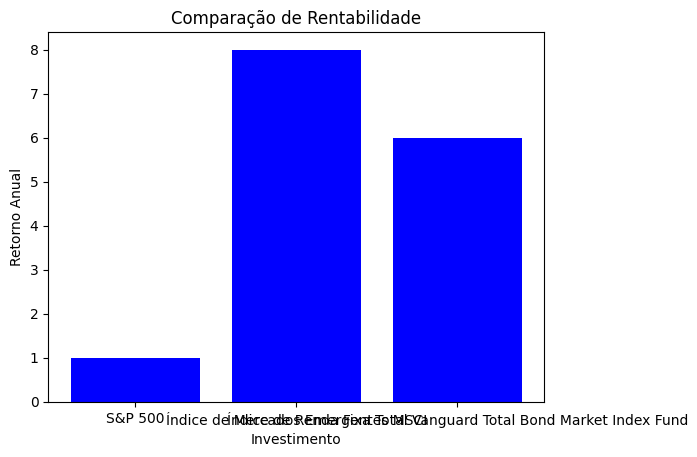

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crie um DataFrame com os dados
df = pd.DataFrame({
  "Investimento": ["S&P 500", "Índice de Mercados Emergentes MSCI", "Índice de Renda Fixa Total Vanguard Total Bond Market Index Fund"],
  "Retorno Anual": [1, 8, 6]
})

# Crie o gráfico de barras
plt.bar(df["Investimento"], df["Retorno Anual"], color="blue")
plt.xlabel("Investimento")
plt.ylabel("Retorno Anual")
plt.title("Comparação de Rentabilidade")

# Mostre o gráfico
plt.show()

In [ ]:
display()

In [ ]:
df

,Data,receitas,patrimônio líquido
0,2019-03-31,9588437,17150414
1,2020-12-31,7537180,20903196
2,2021-09-30,10571556,34011532
3,2022-06-30,13271137,39151403


In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['receitas', 'patrimônio líquido']]], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['patrimônio líquido'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['receitas'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['patrimônio líquido'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['receitas'], **{})
chart

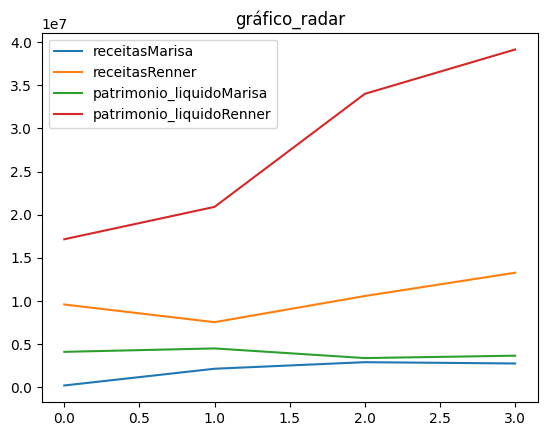

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crie um DataFrame com os dados
df = pd.DataFrame({'receitasMarisa': [199223, 2139417, 2899831,2749921 ], 'patrimonio_liquidoMarisa': [4099032, 4494681, 3375944, 3654020],
                   'receitasRenner': [9588437, 7537180, 10571556,13271137], 'patrimonio_liquidoRenner': [17150414, 20903196, 34011532, 39151403] })
# Crie um gráfico de radar
plt.figure(111)
plt.plot(df.index, df['receitasMarisa'], label='receitasMarisa')
plt.plot(df.index, df['receitasRenner'], label='receitasRenner')
plt.plot(df.index, df['patrimonio_liquidoMarisa'], label='patrimonio_liquidoMarisa')
plt.plot(df.index, df['patrimonio_liquidoRenner'], label='patrimonio_liquidoRenner')
plt.legend()
plt.title('gráfico_radar')
plt.show()

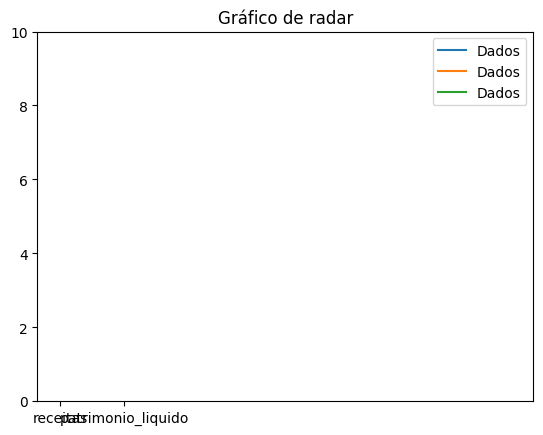

In [ ]:
import matplotlib.pyplot as plt

# Define os dados
data =  [[2019,199223, 4099032],
         [2020,2139417,4494681],
         [2021,2899831,3375944],
         [2022,2749921,3654020],
         [2019,9588437,17150414],
         [2020,7537180,20903196],
         [2021,10571556,34011532],
         [2022,13271137,39151403]]

# Define os nomes das dimensões
labels = ["receitas", "patrimonio_liquido"]

# Cria o gráfico de radar
plt.figure()
ax = plt.subplot(111)
ax.plot(data, label="Dados")
ax.set_title("Gráfico de radar")
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylim([0, 10])
ax.legend()

# Mostra o gráfico
plt.show()

In [ ]:
#Importando pandas e a função files do google.colab para depois baixar o csv

import pandas as pd
from google.colab import files

# Carregar o DataFrame a partir do arquivo CSV
dataset = '/content/teste2.csv'  # Substitua pelo nome do seu arquivo CSV
df = pd.read_csv(dataset)

df.to_csv(dataset, index=False)

# Baixar o novo arquivo CSV
files.download(dataset)
